In [2]:
import numpy as np
import pandas as pd

In [ ]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [12]:
# code here
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
q1=pd.DataFrame(data)
q1['index']=labels
q1.set_index('index',inplace=True)
q1

,birds,age,visits,priority
index,,,,
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,NaN,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no


In [15]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [16]:
q1.iloc[::2]

,birds,age,visits,priority
index,,,,
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [23]:
# code here
q1.iloc[[1,3,7]][['birds','age']]

,birds,age
index,,
b,Cranes,4.0
d,spoonbills,NaN
h,Cranes,NaN


In [24]:
q1[q1['visits']<4]

,birds,age,visits,priority
index,,,,
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [26]:
# code here
q1[ ( q1['age'].isna() |  q1['visits'].isna() ) ]

,birds,age,visits,priority
index,,,,
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [49]:
q1['age']=q1['age'].fillna(q1['age'].dropna().mode()[0])

In [51]:
q1['visits']=q1['visits'].fillna(q1['visits'].dropna().mode()[0])

In [52]:
q1

,birds,age,visits,priority
index,,,,
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,NaN
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no


###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [53]:
# code here
q1['birds'].value_counts()

birds
Cranes        5
spoonbills    4
plovers       2
Name: count, dtype: int64

In [55]:
q1.duplicated().sum()

2

##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

In [80]:
df=pd.read_csv('./datasets/ipl-matches.csv')

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [85]:
# code here
df[['Team1','Team2','TossWinner','WinningTeam']]=df[['Team1','Team2','TossWinner','WinningTeam']].replace('Delhi Capitals','Delhi Daredevils')
df[['Team1','Team2','TossWinner','WinningTeam']]=df[['Team1','Team2','TossWinner','WinningTeam']].replace('Punjab Kings' ,'Kings XI Punjab')
df[['Team1','Team2','TossWinner','WinningTeam']]=df[['Team1','Team2','TossWinner','WinningTeam']].replace('Rising Pune Supergiant' ,'Rising Pune Supergiants')


In [92]:
df[df['Team1'].isin(['Kings XI Punjab'])]['Team1']

14     Kings XI Punjab
22     Kings XI Punjab
36     Kings XI Punjab
42     Kings XI Punjab
46     Kings XI Punjab
            ...       
916    Kings XI Punjab
929    Kings XI Punjab
936    Kings XI Punjab
940    Kings XI Punjab
948    Kings XI Punjab
Name: Team1, Length: 110, dtype: object

###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


In [96]:
# code here
df['Team1'].value_counts().sort_index()

Team1
Chennai Super Kings            111
Deccan Chargers                 39
Delhi Daredevils               114
Gujarat Lions                   16
Gujarat Titans                   7
Kings XI Punjab                110
Kochi Tuskers Kerala             7
Kolkata Knight Riders          105
Lucknow Super Giants             8
Mumbai Indians                 112
Pune Warriors                   23
Rajasthan Royals                89
Rising Pune Supergiants         14
Royal Challengers Bangalore    126
Sunrisers Hyderabad             69
Name: count, dtype: int64

In [97]:
df['Team2'].value_counts().sort_index()

Team2
Chennai Super Kings             97
Deccan Chargers                 36
Delhi Daredevils               110
Gujarat Lions                   14
Gujarat Titans                   9
Kings XI Punjab                108
Kochi Tuskers Kerala             7
Kolkata Knight Riders          118
Lucknow Super Giants             7
Mumbai Indians                 119
Pune Warriors                   23
Rajasthan Royals               103
Rising Pune Supergiants         16
Royal Challengers Bangalore    100
Sunrisers Hyderabad             83
Name: count, dtype: int64

<Axes: xlabel='Team1'>

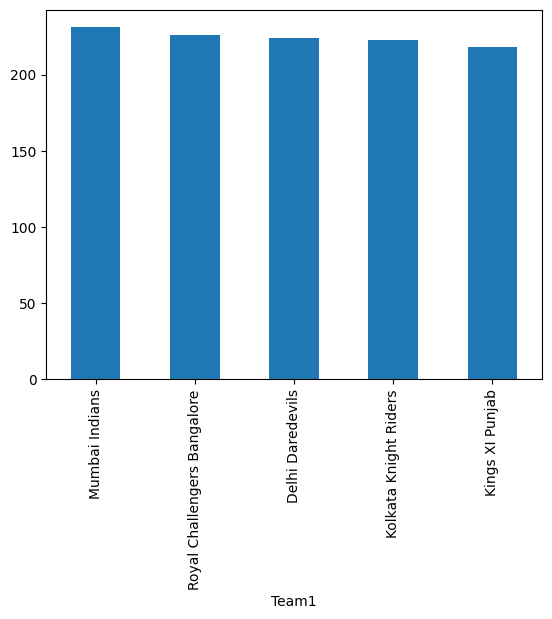

In [112]:
top=(df['Team1'].value_counts().sort_index() + df['Team2'].value_counts().sort_index()).sort_values(ascending=False)
(top.head(5)).plot(kind='bar')

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [139]:
# code here
df[ ( (df['Team1']=='Mumbai Indians') & (~df['Team1Players'].isin(df['Player_of_Match'])) ) | ( (df['Team2']=='Mumbai Indians') & (~df['Team2Players'].isin(df['Player_of_Match'])) ) ]['Player_of_Match'].value_counts().head(1)

Player_of_Match
RG Sharma    16
Name: count, dtype: int64

###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

array([<Axes: ylabel='win'>, <Axes: ylabel='lose'>], dtype=object)

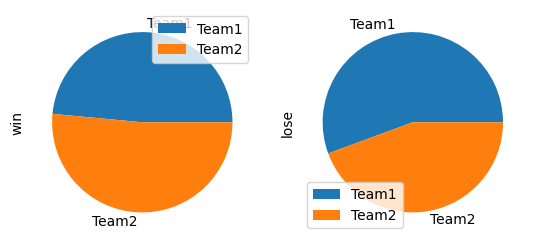

In [171]:
# code here
def fun(t1,t2):
    w1=df[df['WinningTeam']==t1].shape[0]
    w2=df[df['WinningTeam']==t2].shape[0]
    l1=df[ ((df['Team1']==t1) | (df['Team2']==t1)) & ~(df['WinningTeam']==t1) ].shape[0]
    l2=df[ ((df['Team1']==t2) | (df['Team2']==t2)) & ~(df['WinningTeam']==t2) ].shape[0]
    return pd.DataFrame({ 'win':[w1,w2],'lose':[l1,l2] },index=['Team1','Team2']).plot(kind='pie',subplots=True)
fun('Kolkata Knight Riders','Chennai Super Kings')

### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



<Axes: xlabel='City'>

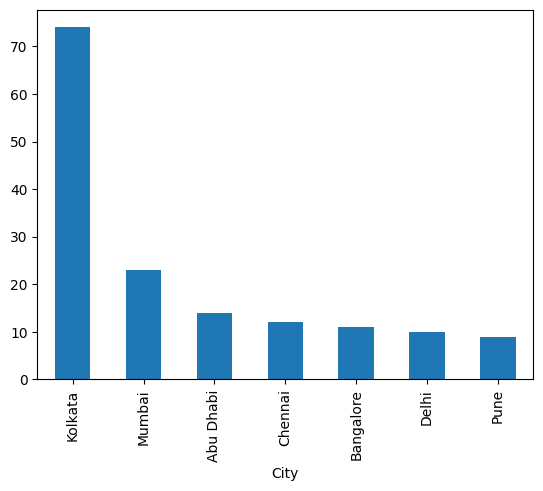

In [177]:
# code here
df[ (df['Team1']=='Kolkata Knight Riders') | (df['Team2']=='Kolkata Knight Riders') ]['City'].value_counts().head(7).plot(kind='bar')

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [222]:
# code here
q10=df[ ((df['Team1']=='Mumbai Indians') | (df['Team2']=='Mumbai Indians')) & ( df['Season'].str.split('/').apply(lambda x:x[0]).isin(['2011']) ) ]
q10['Margin'].mean()

19.25